In [141]:
import sys
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, StratifiedKFold
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import shap 
from sklearn.feature_selection import mutual_info_classif


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier,  VotingClassifier, AdaBoostClassifier, BaggingClassifier, RandomForestClassifier


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix


import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset


In [142]:
data = pd.read_csv("C:/Users/kisha/Documents/Uni-Stuff/Dissertation/books/git/data.csv")

In [143]:
data.head()

,Winner,title_bout,weight_class,no_of_rounds,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,...,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Red,False,Middleweight,3,0.255859,0.015625,0.509478,0.542871,0.002114,0.077554,...,0,2,1,0,Orthodox,187.96,190.50,185.0,34.0,27.0
1,Red,False,Welterweight,3,0.000000,0.000000,0.660000,0.470000,0.000000,0.400000,...,3,3,0,0,Orthodox,190.50,187.96,170.0,37.0,26.0
2,Blue,False,Light Heavyweight,3,0.128906,0.500000,0.314609,0.538398,0.013516,0.162188,...,1,5,5,1,Orthodox,193.04,193.04,205.0,35.0,35.0
3,Red,True,Light Heavyweight,5,0.125000,0.250000,0.565625,0.568750,0.645000,0.098750,...,1,5,0,0,Orthodox,193.04,200.66,205.0,31.0,36.0
4,Blue,False,Women's Bantamweight,3,0.003906,0.250000,0.392988,0.425273,0.723281,0.270820,...,1,0,4,0,Orthodox,167.64,167.64,135.0,32.0,32.0


In [144]:
data.T

,0,1,2,3,4,5,6,7,8,9,...,7700,7701,7702,7703,7704,7705,7706,7707,7708,7709
Winner,Red,Red,Blue,Red,Blue,Blue,Blue,Blue,Red,Blue,...,Red,Red,Red,Red,Red,Red,Red,Red,Red,Red
title_bout,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
weight_class,Middleweight,Welterweight,Light Heavyweight,Light Heavyweight,Women's Bantamweight,Catch Weight,Featherweight,Featherweight,Bantamweight,Bantamweight,...,Open Weight,Open Weight,Open Weight,Open Weight,Open Weight,Open Weight,Open Weight,Open Weight,Open Weight,Open Weight
no_of_rounds,3,3,3,5,3,3,3,3,3,3,...,1,1,1,1,1,1,1,1,1,1
B_avg_KD,0.255859,0.0,0.128906,0.125,0.003906,1.25,1.0,0.376057,0.0,1.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
R_Height_cms,187.96,190.5,193.04,193.04,167.64,170.18,175.26,172.72,177.8,167.64,...,185.42,182.88,185.42,180.34,190.5,177.8,182.88,187.96,NaN,177.8
R_Reach_cms,190.5,187.96,193.04,200.66,167.64,180.34,175.26,177.8,177.8,175.26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
R_Weight_lbs,185.0,170.0,205.0,205.0,135.0,145.0,145.0,145.0,135.0,135.0,...,175.0,210.0,175.0,190.0,260.0,170.0,210.0,225.0,NaN,210.0
B_age,34.0,37.0,35.0,31.0,32.0,29.0,27.0,34.0,29.0,28.0,...,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0


In [145]:
#checking for na/nan values

data["Winner"].isna().sum()

3

In [146]:
#discarding nan values from Winner column since they are not useful for the model

df = data.dropna(subset=["Winner"])

In [147]:
df["Winner"].isna().sum()

0

In [148]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,7700,7701,7702,7703,7704,7705,7706,7707,7708,7709
Winner,Red,Red,Blue,Red,Blue,Blue,Blue,Blue,Red,Blue,...,Red,Red,Red,Red,Red,Red,Red,Red,Red,Red
title_bout,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
weight_class,Middleweight,Welterweight,Light Heavyweight,Light Heavyweight,Women's Bantamweight,Catch Weight,Featherweight,Featherweight,Bantamweight,Bantamweight,...,Open Weight,Open Weight,Open Weight,Open Weight,Open Weight,Open Weight,Open Weight,Open Weight,Open Weight,Open Weight
no_of_rounds,3,3,3,5,3,3,3,3,3,3,...,1,1,1,1,1,1,1,1,1,1
B_avg_KD,0.255859,0.0,0.128906,0.125,0.003906,1.25,1.0,0.376057,0.0,1.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
R_Height_cms,187.96,190.5,193.04,193.04,167.64,170.18,175.26,172.72,177.8,167.64,...,185.42,182.88,185.42,180.34,190.5,177.8,182.88,187.96,NaN,177.8
R_Reach_cms,190.5,187.96,193.04,200.66,167.64,180.34,175.26,177.8,177.8,175.26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
R_Weight_lbs,185.0,170.0,205.0,205.0,135.0,145.0,145.0,145.0,135.0,135.0,...,175.0,210.0,175.0,190.0,260.0,170.0,210.0,225.0,NaN,210.0
B_age,34.0,37.0,35.0,31.0,32.0,29.0,27.0,34.0,29.0,28.0,...,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0


In [149]:
#now checking for na/nan values in the rest of the columns

df.isna().sum()

Winner             0
title_bout         0
weight_class       0
no_of_rounds       0
B_avg_KD        1661
                ... 
R_Height_cms      23
R_Reach_cms      418
R_Weight_lbs      21
B_age            172
R_age             82
Length: 140, dtype: int64

In [150]:
#since weight is same in each weight class, we can fill na values with the mean of each weight class

df["weight_class"].value_counts()


weight_class
Lightweight              1322
Welterweight             1285
Middleweight             1019
Featherweight             745
Heavyweight               704
Light Heavyweight         690
Bantamweight              671
Flyweight                 338
Women's Strawweight       305
Women's Flyweight         225
Women's Bantamweight      207
Open Weight                86
Catch Weight               81
Women's Featherweight      29
Name: count, dtype: int64

In [151]:
mean_weights = df.groupby("weight_class")[["R_Weight_lbs", "B_Weight_lbs"]].transform('mean')

mean_weights

,R_Weight_lbs,B_Weight_lbs
0,184.590775,184.794494
1,170.449805,169.729183
2,204.365217,202.308696
3,204.365217,202.308696
4,133.550725,132.439614
...,...,...
7705,225.635294,237.120482
7706,225.635294,237.120482
7707,225.635294,237.120482
7708,225.635294,237.120482


In [152]:
# df['R_Weight_lbs'] = df['R_Weight_lbs'].fillna(mean_weights['R_Weight_lbs'])
# df['B_Weight_lbs'] = df['B_Weight_lbs'].fillna(mean_weights['B_Weight_lbs'])

df.loc[df['R_Weight_lbs'].isna(), 'R_Weight_lbs'] = mean_weights['R_Weight_lbs']
df.loc[df['B_Weight_lbs'].isna(), 'B_Weight_lbs'] = mean_weights['B_Weight_lbs']

In [153]:
print(df['R_Weight_lbs'].isna().sum())
print(df['B_Weight_lbs'].isna().sum())

0
0


In [154]:
#using same approach for height

mean_heights = df.groupby("weight_class")[["R_Height_cms", "B_Height_cms"]].transform('mean')

mean_heights

,R_Height_cms,B_Height_cms
0,184.641532,184.251150
1,181.330304,181.063455
2,187.716691,187.315797
3,187.716691,187.315797
4,169.333333,168.940676
...,...,...
7705,186.226824,184.624337
7706,186.226824,184.624337
7707,186.226824,184.624337
7708,186.226824,184.624337


In [155]:
df.loc[df['R_Height_cms'].isna(), 'R_Height_cms'] = mean_heights['R_Height_cms']
df.loc[df['B_Height_cms'].isna(), 'B_Height_cms'] = mean_heights['B_Height_cms']

In [156]:
print(df['R_Height_cms'].isna().sum())
print(df['B_Height_cms'].isna().sum())

0
0


In [157]:
#correlation between reach and height

df[["R_Reach_cms", "R_Height_cms"]].corr()

,R_Reach_cms,R_Height_cms
R_Reach_cms,1.000000,0.896849
R_Height_cms,0.896849,1.000000


In [158]:
#since the correlation is high, we can fill na values in reach with the height. Reach is also the wingspan of the fighter which is usually the same as the height

df.loc[df['R_Reach_cms'].isna(), 'R_Reach_cms'] = df.loc[df['R_Reach_cms'].isna(), 'R_Height_cms']
df.loc[df['B_Reach_cms'].isna(), 'B_Reach_cms'] = df.loc[df['B_Reach_cms'].isna(), 'B_Height_cms']


In [159]:
df['B_Reach_cms'].isna().sum()

0

In [160]:
df.isna().sum()

Winner             0
title_bout         0
weight_class       0
no_of_rounds       0
B_avg_KD        1661
                ... 
R_Height_cms       0
R_Reach_cms        0
R_Weight_lbs       0
B_age            172
R_age             82
Length: 140, dtype: int64

In [161]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,7700,7701,7702,7703,7704,7705,7706,7707,7708,7709
Winner,Red,Red,Blue,Red,Blue,Blue,Blue,Blue,Red,Blue,...,Red,Red,Red,Red,Red,Red,Red,Red,Red,Red
title_bout,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
weight_class,Middleweight,Welterweight,Light Heavyweight,Light Heavyweight,Women's Bantamweight,Catch Weight,Featherweight,Featherweight,Bantamweight,Bantamweight,...,Open Weight,Open Weight,Open Weight,Open Weight,Open Weight,Open Weight,Open Weight,Open Weight,Open Weight,Open Weight
no_of_rounds,3,3,3,5,3,3,3,3,3,3,...,1,1,1,1,1,1,1,1,1,1
B_avg_KD,0.255859,0.0,0.128906,0.125,0.003906,1.25,1.0,0.376057,0.0,1.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
R_Height_cms,187.96,190.5,193.04,193.04,167.64,170.18,175.26,172.72,177.8,167.64,...,185.42,182.88,185.42,180.34,190.5,177.8,182.88,187.96,186.226824,177.8
R_Reach_cms,190.5,187.96,193.04,200.66,167.64,180.34,175.26,177.8,177.8,175.26,...,185.42,182.88,185.42,180.34,190.5,177.8,182.88,187.96,186.226824,177.8
R_Weight_lbs,185.0,170.0,205.0,205.0,135.0,145.0,145.0,145.0,135.0,135.0,...,175.0,210.0,175.0,190.0,260.0,170.0,210.0,225.0,225.635294,210.0
B_age,34.0,37.0,35.0,31.0,32.0,29.0,27.0,34.0,29.0,28.0,...,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0


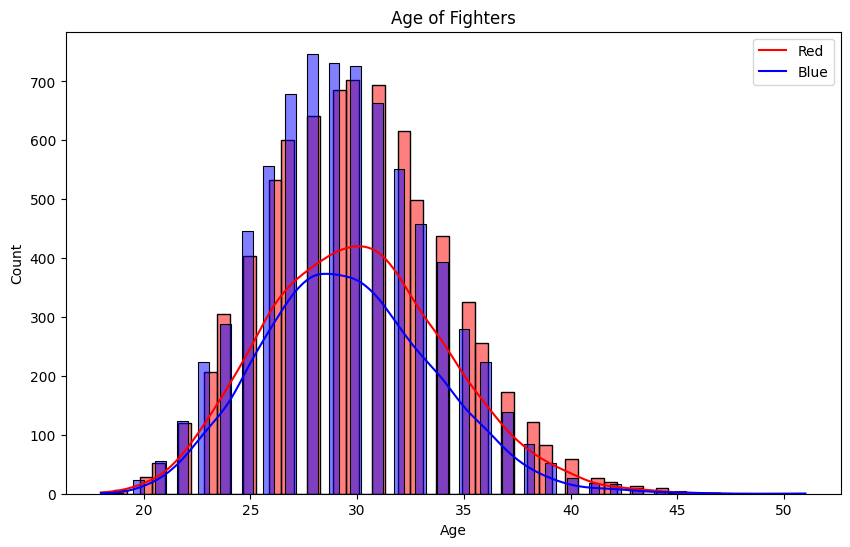

In [162]:
#plot of age in red and blue fighters

plt.figure(figsize=(10, 6))
sns.histplot(df["R_age"], color="red", kde=True)
sns.histplot(df["B_age"], color="blue", kde=True)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age of Fighters")
plt.legend(["Red", "Blue"])
plt.show()

In [163]:
#the age distribution looks like a normal distribution so we can fill na values with the median of the age because its robust to outliers

# df["R_age"] = df["R_age"].fillna(df["R_age"].median())
# df["B_age"] = df["B_age"].fillna(df["B_age"].median())

df.loc[df["R_age"].isna(), "R_age"] = df["R_age"].median()
df.loc[df["B_age"].isna(), "B_age"] = df["B_age"].median()

In [164]:
null_columns = df.columns[df.isnull().any()]

print("Columns with null values:")
for column in null_columns:
    print(f"{column}: {df[column].isnull().sum()} null values")

Columns with null values:
B_avg_KD: 1661 null values
B_avg_opp_KD: 1661 null values
B_avg_SIG_STR_pct: 1661 null values
B_avg_opp_SIG_STR_pct: 1661 null values
B_avg_TD_pct: 1661 null values
B_avg_opp_TD_pct: 1661 null values
B_avg_SUB_ATT: 1661 null values
B_avg_opp_SUB_ATT: 1661 null values
B_avg_REV: 1661 null values
B_avg_opp_REV: 1661 null values
B_avg_SIG_STR_att: 1661 null values
B_avg_SIG_STR_landed: 1661 null values
B_avg_opp_SIG_STR_att: 1661 null values
B_avg_opp_SIG_STR_landed: 1661 null values
B_avg_TOTAL_STR_att: 1661 null values
B_avg_TOTAL_STR_landed: 1661 null values
B_avg_opp_TOTAL_STR_att: 1661 null values
B_avg_opp_TOTAL_STR_landed: 1661 null values
B_avg_TD_att: 1661 null values
B_avg_TD_landed: 1661 null values
B_avg_opp_TD_att: 1661 null values
B_avg_opp_TD_landed: 1661 null values
B_avg_HEAD_att: 1661 null values
B_avg_HEAD_landed: 1661 null values
B_avg_opp_HEAD_att: 1661 null values
B_avg_opp_HEAD_landed: 1661 null values
B_avg_BODY_att: 1661 null values
B_avg

In [165]:
numerical_columns = df[null_columns].select_dtypes(include=['float64', 'int64']).columns
categorical_columns = df[null_columns].select_dtypes(include=['object']).columns

In [166]:
#since mean is robust to ouytliers, we can fill na values in numerical columns with the mean of the column

for col in numerical_columns:
    #df[col].fillna(df[col].median(), inplace=True)
    df.loc[df[col].isna(), col] = df[col].median()

for col in categorical_columns:
    #df[col].fillna(df[col].mode()[0], inplace=True)
    df.loc[df[col].isna(), col] = df[col].mode()[0]

In [167]:
null_columns = df.columns[df.isnull().any()]

print("Columns with null values:")
for column in null_columns:
    print(f"{column}: {df[column].isnull().sum()} null values")

Columns with null values:


In [168]:
df['B_Stance'].value_counts()

B_Stance
Orthodox       5791
Southpaw       1485
Switch          418
Open Stance       9
Sideways          4
Name: count, dtype: int64

In [169]:
df['R_Stance'].value_counts()

R_Stance
Orthodox       5787
Southpaw       1530
Switch          373
Open Stance      15
Sideways          2
Name: count, dtype: int64

In [170]:
#dropping weight class for model prediction since fighters will be fighting in the same weight class
# df.drop(columns=["weight_class", "R_Stance", "B_Stance"], inplace=True)

df = pd.concat([df, pd.get_dummies(df[["weight_class", "B_Stance", "R_Stance"]], prefix="weight_class")], axis=1)
df.drop(columns=['weight_class', 'B_Stance', 'R_Stance'], inplace=True)

In [171]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,7700,7701,7702,7703,7704,7705,7706,7707,7708,7709
Winner,Red,Red,Blue,Red,Blue,Blue,Blue,Blue,Red,Blue,...,Red,Red,Red,Red,Red,Red,Red,Red,Red,Red
title_bout,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
no_of_rounds,3,3,3,5,3,3,3,3,3,3,...,1,1,1,1,1,1,1,1,1,1
B_avg_KD,0.255859,0.0,0.128906,0.125,0.003906,1.25,1.0,0.376057,0.0,1.0,...,0.0,0.023438,0.023438,0.023438,0.023438,0.023438,0.023438,0.023438,0.023438,0.023438
B_avg_opp_KD,0.015625,0.0,0.5,0.25,0.25,0.0,0.0,0.660652,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
weight_class_Open Stance,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
weight_class_Orthodox,True,True,True,True,True,True,False,True,False,True,...,False,True,False,False,False,False,True,True,True,True
weight_class_Sideways,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
weight_class_Southpaw,False,False,False,False,False,False,False,False,False,False,...,True,False,True,True,True,True,False,False,False,False


In [172]:
#check for categories in the Winner column

df["Winner"].value_counts()

Winner
Red     4925
Blue    2639
Draw     143
Name: count, dtype: int64

In [173]:
#dropping draw since the model will be predicting the winner and also they are very few, 143 out of 7564

df = df[df["Winner"] != "Draw"]

In [174]:
df['Winner'] = df['Winner'].replace({'Red': 0, 'Blue': 1})


df['title_bout'] = df['title_bout'].astype(int)

C:\Users\kisha\AppData\Local\Temp\ipykernel_4280\2739264854.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Winner'] = df['Winner'].replace({'Red': 0, 'Blue': 1})


In [175]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,7700,7701,7702,7703,7704,7705,7706,7707,7708,7709
Winner,0,0,1,0,1,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
title_bout,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
no_of_rounds,3,3,3,5,3,3,3,3,3,3,...,1,1,1,1,1,1,1,1,1,1
B_avg_KD,0.255859,0.0,0.128906,0.125,0.003906,1.25,1.0,0.376057,0.0,1.0,...,0.0,0.023438,0.023438,0.023438,0.023438,0.023438,0.023438,0.023438,0.023438,0.023438
B_avg_opp_KD,0.015625,0.0,0.5,0.25,0.25,0.0,0.0,0.660652,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
weight_class_Open Stance,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
weight_class_Orthodox,True,True,True,True,True,True,False,True,False,True,...,False,True,False,False,False,False,True,True,True,True
weight_class_Sideways,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
weight_class_Southpaw,False,False,False,False,False,False,False,False,False,False,...,True,False,True,True,True,True,False,False,False,False


In [180]:
df.to_csv("C:/Users/kisha/Documents/Uni-Stuff/Dissertation/books/git/data_cleaned.csv", index=False)

In [176]:

X = df.drop(columns=["Winner"])
y = df["Winner"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [37]:
#LOGISTIC REGRESSION

log_reg = LogisticRegression(max_iter=10000, solver='saga')
log_reg.fit(X_train_scaled, y_train)
y_pred = log_reg.predict(X_test_scaled)
y_pred_prob = log_reg.predict_proba(X_test_scaled)[:, 1]

#evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [38]:
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.67
Precision: 0.54
Recall: 0.31
F1 Score: 0.39
ROC AUC: 0.69
Confusion Matrix:
[[1286  201]
 [ 543  240]]
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.86      0.78      1487
           1       0.54      0.31      0.39       783

    accuracy                           0.67      2270
   macro avg       0.62      0.59      0.58      2270
weighted avg       0.65      0.67      0.64      2270



In [39]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [40]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

In [41]:
log_reg_smote = LogisticRegression(max_iter=10000, solver='saga')
log_reg_smote.fit(X_train_scaled, y_train_resampled)

y_pred_lrsmote = log_reg_smote.predict(X_test_scaled)
y_pred_prob_lrsmote = log_reg_smote.predict_proba(X_test_scaled)[:, 1]

#evaluate the model
accuracy = accuracy_score(y_test, y_pred_lrsmote)
precision = precision_score(y_test, y_pred_lrsmote)
recall = recall_score(y_test, y_pred_lrsmote)
f1 = f1_score(y_test, y_pred_lrsmote)
roc_auc = roc_auc_score(y_test, y_pred_prob_lrsmote)
conf_matrix = confusion_matrix(y_test, y_pred_lrsmote)
class_report = classification_report(y_test, y_pred_lrsmote)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.67
Precision: 0.54
Recall: 0.33
F1 Score: 0.41
ROC AUC: 0.68
Confusion Matrix:
[[1270  217]
 [ 525  258]]
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.85      0.77      1487
           1       0.54      0.33      0.41       783

    accuracy                           0.67      2270
   macro avg       0.63      0.59      0.59      2270
weighted avg       0.65      0.67      0.65      2270



In [42]:
undersampler = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

#standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)


In [43]:
log_reg_undersamp = LogisticRegression(max_iter=1000, solver='lbfgs')
log_reg_undersamp.fit(X_train_scaled, y_train_resampled)

#predict on the test set
y_pred_lrunder = log_reg_undersamp.predict(X_test_scaled)
y_pred_prob_lrunder = log_reg_undersamp.predict_proba(X_test_scaled)[:, 1]

#evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred_lrunder)
recall = recall_score(y_test, y_pred_lrunder)
f1 = f1_score(y_test, y_pred_lrunder)
roc_auc = roc_auc_score(y_test, y_pred_prob_lrunder)
conf_matrix = confusion_matrix(y_test, y_pred_lrunder)
class_report = classification_report(y_test, y_pred_lrunder)

#print evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.67
Precision: 0.47
Recall: 0.62
F1 Score: 0.53
ROC AUC: 0.68
Confusion Matrix:
[[927 560]
 [296 487]]
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.62      0.68      1487
           1       0.47      0.62      0.53       783

    accuracy                           0.62      2270
   macro avg       0.61      0.62      0.61      2270
weighted avg       0.66      0.62      0.63      2270



In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

#standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [45]:
param_grid = {
    'solver': ['lbfgs', 'liblinear', 'saga'],
    'C': [0.1, 1, 10, 100],
    'class_weight': [None, 'balanced']
}

grid_search = GridSearchCV(LogisticRegression(max_iter=10000), param_grid, cv=5, scoring='f1')
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=10000),
             param_grid={'C': [0.1, 1, 10, 100],
                         'class_weight': [None, 'balanced'],
                         'solver': ['lbfgs', 'liblinear', 'saga']},
             scoring='f1')

In [46]:
best_model = grid_search.best_estimator_

#predict on the test set
y_pred = best_model.predict(X_test_scaled)
y_pred_prob = best_model.predict_proba(X_test_scaled)[:, 1]

#evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

#print evaluation metrics
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Best Parameters: {'C': 0.1, 'class_weight': 'balanced', 'solver': 'liblinear'}
Accuracy: 0.65
Precision: 0.49
Recall: 0.66
F1 Score: 0.56
ROC AUC: 0.69
Confusion Matrix:
[[1261  709]
 [ 362  694]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.64      0.70      1970
           1       0.49      0.66      0.56      1056

    accuracy                           0.65      3026
   macro avg       0.64      0.65      0.63      3026
weighted avg       0.68      0.65      0.65      3026



In [47]:
rf_model = RandomForestClassifier(class_weight='balanced_subsample', random_state=42)
rf_model.fit(X_train_scaled, y_train)

#predict on the test set
y_pred_rf = rf_model.predict(X_test_scaled)
y_pred_prob_rf = rf_model.predict_proba(X_test_scaled)[:, 1]

#evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_prob_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

#print evaluation metrics
print("Random Forest Classifier")
print(f"Accuracy: {accuracy_rf:.2f}")
print(f"Precision: {precision_rf:.2f}")
print(f"Recall: {recall_rf:.2f}")
print(f"F1 Score: {f1_rf:.2f}")
print(f"ROC AUC: {roc_auc_rf:.2f}")
print("Confusion Matrix:")
print(conf_matrix_rf)
print("Classification Report:")
print(class_report_rf)

Random Forest Classifier
Accuracy: 0.65
Precision: 0.51
Recall: 0.15
F1 Score: 0.23
ROC AUC: 0.64
Confusion Matrix:
[[1816  154]
 [ 896  160]]
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.92      0.78      1970
           1       0.51      0.15      0.23      1056

    accuracy                           0.65      3026
   macro avg       0.59      0.54      0.50      3026
weighted avg       0.61      0.65      0.59      3026



In [48]:
#random forest with k fold cross validation

rf_model_kf = RandomForestClassifier(class_weight='balanced_subsample', random_state=42)

cv = KFold(n_splits=5, shuffle=True, random_state=42)

accuracy_scores = cross_val_score(rf_model_kf, X_train_scaled, y_train, cv=cv, scoring='accuracy')
precision_scores = cross_val_score(rf_model_kf, X_train_scaled, y_train, cv=cv, scoring='precision')
recall_scores = cross_val_score(rf_model_kf, X_train_scaled, y_train, cv=cv, scoring='recall')
f1_scores = cross_val_score(rf_model_kf, X_train_scaled, y_train, cv=cv, scoring='f1')
roc_auc_scores = cross_val_score(rf_model_kf, X_train_scaled, y_train, cv=cv, scoring='roc_auc')

print("Random Forest Classifier")
print(f"Accuracy: {accuracy_scores.mean():.2f}")
print(f"Precision: {precision_scores.mean():.2f}")
print(f"Recall: {recall_scores.mean():.2f}")
print(f"F1 Score: {f1_scores.mean():.2f}")
print(f"ROC AUC: {roc_auc_scores.mean():.2f}")


Random Forest Classifier
Accuracy: 0.66
Precision: 0.55
Recall: 0.14
F1 Score: 0.22
ROC AUC: 0.65


In [49]:
from sklearn.ensemble import GradientBoostingClassifier

#initialize and fit the Gradient Boosting classifier
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_scaled, y_train)

#predict on the test set
y_pred_gb = gb_model.predict(X_test_scaled)
y_pred_prob_gb = gb_model.predict_proba(X_test_scaled)[:, 1]

#evaluate the model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb)
recall_gb = recall_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb)
roc_auc_gb = roc_auc_score(y_test, y_pred_prob_gb)
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
class_report_gb = classification_report(y_test, y_pred_gb)

#print evaluation metrics
print("Gradient Boosting Classifier")
print(f"Accuracy: {accuracy_gb:.2f}")
print(f"Precision: {precision_gb:.2f}")
print(f"Recall: {recall_gb:.2f}")
print(f"F1 Score: {f1_gb:.2f}")
print(f"ROC AUC: {roc_auc_gb:.2f}")
print("Confusion Matrix:")
print(conf_matrix_gb)
print("Classification Report:")
print(class_report_gb)

Gradient Boosting Classifier
Accuracy: 0.67
Precision: 0.55
Recall: 0.24
F1 Score: 0.33
ROC AUC: 0.67
Confusion Matrix:
[[1765  205]
 [ 805  251]]
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.90      0.78      1970
           1       0.55      0.24      0.33      1056

    accuracy                           0.67      3026
   macro avg       0.62      0.57      0.55      3026
weighted avg       0.64      0.67      0.62      3026



In [177]:
#XGBClassifier

xgb_model_1 = xgb.XGBClassifier(random_state=42)
xgb_model_1.fit(X_train_scaled, y_train)

#predict on the test set

y_pred_xgb = xgb_model_1.predict(X_test_scaled)
y_pred_prob_xgb = xgb_model_1.predict_proba(X_test_scaled)[:, 1]

#evaluate the model

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_pred_prob_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

print("XGB Classifier")
print(f"Accuracy: {accuracy_xgb:}")
print(f"Precision: {precision_xgb:}")
print(f"Recall: {recall_xgb:}")
print(f"F1 Score: {f1_xgb:}")
print(f"ROC AUC: {roc_auc_xgb:}")
print("Confusion Matrix:")
print(conf_matrix_xgb)



XGB Classifier
Accuracy: 0.6444933920704846
Precision: 0.4766536964980545
Recall: 0.3128991060025543
F1 Score: 0.37779491133384735
ROC AUC: 0.6516647900364246
Confusion Matrix:
[[1218  269]
 [ 538  245]]


In [55]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,7700,7701,7702,7703,7704,7705,7706,7707,7708,7709
Winner,0,0,1,0,1,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
title_bout,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
no_of_rounds,3,3,3,5,3,3,3,3,3,3,...,1,1,1,1,1,1,1,1,1,1
B_avg_KD,0.255859,0.0,0.128906,0.125,0.003906,1.25,1.0,0.376057,0.0,1.0,...,0.0,0.023438,0.023438,0.023438,0.023438,0.023438,0.023438,0.023438,0.023438,0.023438
B_avg_opp_KD,0.015625,0.0,0.5,0.25,0.25,0.0,0.0,0.660652,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
weight_class_Open Stance,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
weight_class_Orthodox,True,True,True,True,True,True,False,True,False,True,...,False,True,False,False,False,False,True,True,True,True
weight_class_Sideways,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
weight_class_Southpaw,False,False,False,False,False,False,False,False,False,False,...,True,False,True,True,True,True,False,False,False,False


In [60]:
#neural nets

X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)

X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(160, 128)  # Update the input layer to have 160 neurons
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 16)
        self.fc5 = nn.Linear(16, 8)
        self.fc6 = nn.Linear(8, 1)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.relu(self.fc3(x))
        x = self.dropout(x)
        x = self.relu(self.fc4(x))
        x = self.dropout(x)
        x = self.relu(self.fc5(x))
        x = self.sigmoid(self.fc6(x))
        return x




In [61]:
def train_model(model, train_loader, criterion, optimizer, num_epochs=25):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels.unsqueeze(1))
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * inputs.size(0)

        epoch_loss = running_loss / len(train_loader.dataset)
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}')


In [62]:
def evaluate_model(model, test_loader):
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            preds = outputs.round().squeeze()
            all_preds.extend(preds.tolist())
            all_labels.extend(labels.tolist())

    accuracy = accuracy_score(all_labels, all_preds)
    precision = precision_score(all_labels, all_preds)
    recall = recall_score(all_labels, all_preds)
    f1 = f1_score(all_labels, all_preds)
    roc_auc = roc_auc_score(all_labels, all_preds)

    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"ROC AUC: {roc_auc:.2f}")

    conf_matrix = confusion_matrix(all_labels, all_preds)
    print("Confusion Matrix:")
    print(conf_matrix)

In [63]:
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)

X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

model = NeuralNetwork()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)

num_epochs = 1000
train_model(model, train_loader, criterion, optimizer, num_epochs)

evaluate_model(model, test_loader)

Epoch 1/1000, Loss: 0.6631
Epoch 2/1000, Loss: 0.6289
Epoch 3/1000, Loss: 0.6149
Epoch 4/1000, Loss: 0.6083
Epoch 5/1000, Loss: 0.6000
Epoch 6/1000, Loss: 0.5911
Epoch 7/1000, Loss: 0.5951
Epoch 8/1000, Loss: 0.5860
Epoch 9/1000, Loss: 0.5807
Epoch 10/1000, Loss: 0.5822
Epoch 11/1000, Loss: 0.5734
Epoch 12/1000, Loss: 0.5752
Epoch 13/1000, Loss: 0.5676
Epoch 14/1000, Loss: 0.5605
Epoch 15/1000, Loss: 0.5548
Epoch 16/1000, Loss: 0.5528
Epoch 17/1000, Loss: 0.5446
Epoch 18/1000, Loss: 0.5400
Epoch 19/1000, Loss: 0.5370
Epoch 20/1000, Loss: 0.5266
Epoch 21/1000, Loss: 0.5396
Epoch 22/1000, Loss: 0.5243
Epoch 23/1000, Loss: 0.5307
Epoch 24/1000, Loss: 0.5259
Epoch 25/1000, Loss: 0.5231
Epoch 26/1000, Loss: 0.5159
Epoch 27/1000, Loss: 0.5088
Epoch 28/1000, Loss: 0.5115
Epoch 29/1000, Loss: 0.5097
Epoch 30/1000, Loss: 0.5014
Epoch 31/1000, Loss: 0.5071
Epoch 32/1000, Loss: 0.4919
Epoch 33/1000, Loss: 0.5015
Epoch 34/1000, Loss: 0.4853
Epoch 35/1000, Loss: 0.4903
Epoch 36/1000, Loss: 0.4916
E

In [64]:
mutual_info = mutual_info_classif(X, y)
mutual_info_series = pd.Series(mutual_info, index=X.columns)
mutual_info_series.sort_values(ascending=False, inplace=True)
print(mutual_info_series)

R_avg_opp_SIG_STR_landed     0.023623
R_age                        0.023384
R_avg_opp_HEAD_att           0.021939
R_losses                     0.021469
R_Weight_lbs                 0.020103
                               ...   
B_losses                     0.000000
B_avg_opp_SIG_STR_pct        0.000000
weight_class_Catch Weight    0.000000
R_total_title_bouts          0.000000
title_bout                   0.000000
Length: 160, dtype: float64


In [65]:
top_features = mutual_info_series.head(50).index
X_top = X[top_features]

In [66]:
X_train_top, X_test_top, y_train, y_test = train_test_split(X_top, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled_top = scaler.fit_transform(X_train_top)
X_test_scaled_top = scaler.transform(X_test_top)

In [67]:
X_train_tensor_top = torch.tensor(X_train_scaled_top, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)

X_test_tensor_top = torch.tensor(X_test_scaled_top, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

train_dataset_top = TensorDataset(X_train_tensor_top, y_train_tensor)
test_dataset_top = TensorDataset(X_test_tensor_top, y_test_tensor)

train_loader_top = DataLoader(train_dataset_top, batch_size=64, shuffle=True)
test_loader_top = DataLoader(test_dataset_top, batch_size=64, shuffle=False)

In [68]:
class DeepNeuralNetwork(nn.Module):
    def __init__(self, input_size=160, hidden_size=128, num_hidden_layers=18, dropout_prob=0.5):
        super(DeepNeuralNetwork, self).__init__()
        self.layers = nn.ModuleList()

        self.layers.append(nn.Linear(input_size, hidden_size))
        self.layers.append(nn.ReLU())
        self.layers.append(nn.Dropout(dropout_prob))
        self.layers.append(nn.BatchNorm1d(hidden_size))

        for _ in range(num_hidden_layers):
            self.layers.append(nn.Linear(hidden_size, hidden_size))
            self.layers.append(nn.ReLU())
            self.layers.append(nn.Dropout(dropout_prob))
            self.layers.append(nn.BatchNorm1d(hidden_size))

        self.layers.append(nn.Linear(hidden_size, 1))
        self.layers.append(nn.Sigmoid())

    def forward(self, x):
        for layer in self.layers:
            x = layer(x)
        return x


In [69]:
def train_model(model, train_loader, criterion, optimizer, num_epochs=25):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels.unsqueeze(1))
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * inputs.size(0)

        epoch_loss = running_loss / len(train_loader.dataset)
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}')

In [70]:
def evaluate_model(model, test_loader):
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            preds = outputs.round().squeeze()
            all_preds.extend(preds.tolist())
            all_labels.extend(labels.tolist())

    accuracy = accuracy_score(all_labels, all_preds)
    precision = precision_score(all_labels, all_preds)
    recall = recall_score(all_labels, all_preds)
    f1 = f1_score(all_labels, all_preds)
    roc_auc = roc_auc_score(all_labels, all_preds)

    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"ROC AUC: {roc_auc:.2f}")

    conf_matrix = confusion_matrix(all_labels, all_preds)
    print("Confusion Matrix:")
    print(conf_matrix)

In [72]:
# model = DeepNeuralNetwork()
# criterion = nn.BCELoss()
# optimizer = optim.Adam(model.parameters(), lr=0.0001, weight_decay=1e-5)  # L2 regularization

# num_epochs = 25
# train_model(model, train_loader_top, criterion, optimizer, num_epochs)
# evaluate_model(model, test_loader_top)


In [73]:
# class SimplifiedNeuralNetwork(nn.Module):
#     def __init__(self):
#         super(SimplifiedNeuralNetwork, self).__init__()
#         self.fc1 = nn.Linear(len(top_features), 128)
#         self.fc2 = nn.Linear(128, 64)
#         self.fc3 = nn.Linear(64, 32)
#         self.fc4 = nn.Linear(32, 1)
#         self.relu = nn.ReLU()
#         self.dropout = nn.Dropout(0.5)
#         self.sigmoid = nn.Sigmoid()

#     def forward(self, x):
#         x = self.relu(self.fc1(x))
#         x = self.dropout(x)
#         x = self.relu(self.fc2(x))
#         x = self.dropout(x)
#         x = self.relu(self.fc3(x))
#         x = self.sigmoid(self.fc4(x))
#         return x

# simpNN = SimplifiedNeuralNetwork()

In [74]:
# smote = SMOTE(random_state=42)
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train_top, y_train)

# X_train_scaled_top_resampled = scaler.fit_transform(X_train_resampled)
# X_train_tensor_top_resampled = torch.tensor(X_train_scaled_top_resampled, dtype=torch.float32)
# y_train_tensor_resampled = torch.tensor(y_train_resampled.values, dtype=torch.float32)

# train_dataset_top_resampled = TensorDataset(X_train_tensor_top_resampled, y_train_tensor_resampled)
# train_loader_top_resampled = DataLoader(train_dataset_top_resampled, batch_size=64, shuffle=True)

In [75]:
# def init_weights(m):
#     if isinstance(m, nn.Linear):
#         nn.init.xavier_uniform_(m.weight)
#         m.bias.data.fill_(0.001)

# model.apply(init_weights)

In [76]:
# def train_model(model, train_loader, criterion, optimizer, num_epochs=25):
#     model.train()
#     for epoch in range(num_epochs):
#         running_loss = 0.0
#         for inputs, labels in train_loader:
#             optimizer.zero_grad()
#             outputs = model(inputs)
#             loss = criterion(outputs, labels.unsqueeze(1))
#             loss.backward()
#             optimizer.step()
#             running_loss += loss.item() * inputs.size(0)

#         epoch_loss = running_loss / len(train_loader.dataset)
#         print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}')

In [77]:
# def evaluate_model(model, test_loader):
#     model.eval()
#     all_preds = []
#     all_labels = []
#     with torch.no_grad():
#         for inputs, labels in test_loader:
#             outputs = model(inputs)
#             preds = outputs.round().squeeze()
#             all_preds.extend(preds.tolist())
#             all_labels.extend(labels.tolist())

#     accuracy = accuracy_score(all_labels, all_preds)
#     precision = precision_score(all_labels, all_preds)
#     recall = recall_score(all_labels, all_preds)
#     f1 = f1_score(all_labels, all_preds)
#     roc_auc = roc_auc_score(all_labels, all_preds)

#     print(f"Accuracy: {accuracy:.2f}")
#     print(f"Precision: {precision:.2f}")
#     print(f"Recall: {recall:.2f}")
#     print(f"F1 Score: {f1:.2f}")
#     print(f"ROC AUC: {roc_auc:.2f}")

#     conf_matrix = confusion_matrix(all_labels, all_preds)
#     print("Confusion Matrix:")
#     print(conf_matrix)

In [78]:
# num_epochs = 25
# train_model(model, train_loader_top_resampled, criterion, optimizer, num_epochs)

# evaluate_model(model, test_loader_top)


In [79]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,7700,7701,7702,7703,7704,7705,7706,7707,7708,7709
Winner,0,0,1,0,1,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
title_bout,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
no_of_rounds,3,3,3,5,3,3,3,3,3,3,...,1,1,1,1,1,1,1,1,1,1
B_avg_KD,0.255859,0.0,0.128906,0.125,0.003906,1.25,1.0,0.376057,0.0,1.0,...,0.0,0.023438,0.023438,0.023438,0.023438,0.023438,0.023438,0.023438,0.023438,0.023438
B_avg_opp_KD,0.015625,0.0,0.5,0.25,0.25,0.0,0.0,0.660652,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
weight_class_Open Stance,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
weight_class_Orthodox,True,True,True,True,True,True,False,True,False,True,...,False,True,False,False,False,False,True,True,True,True
weight_class_Sideways,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
weight_class_Southpaw,False,False,False,False,False,False,False,False,False,False,...,True,False,True,True,True,True,False,False,False,False


In [106]:
features = df.columns.drop('Winner')
X = df[features].values
y = df['Winner'].values


In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [118]:
X_train_res = scaler.fit_transform(X_train_res)
X_test = scaler.transform(X_test)

In [121]:
xgb_params = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'alpha': [0, 0.5, 1],
    'lambda': [1, 1.5, 2]
}
xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False)
xgb_grid = GridSearchCV(xgb_model, xgb_params, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
xgb_grid.fit(X_train_res, y_train_res)
best_xgb = xgb_grid.best_estimator_

Fitting 3 folds for each of 243 candidates, totalling 729 fits


In [109]:
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
rf_model = RandomForestClassifier(random_state=42)
rf_grid = GridSearchCV(rf_model, rf_params, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
rf_grid.fit(X_train_res, y_train_res)
best_rf = rf_grid.best_estimator_

Fitting 3 folds for each of 27 candidates, totalling 81 fits


In [110]:
lr_params = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_grid = GridSearchCV(lr_model, lr_params, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
lr_grid.fit(X_train_res, y_train_res)
best_lr = lr_grid.best_estimator_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [111]:
nb_model = GaussianNB()

#Gradient Boosting Classifier
gb_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5]
}
gb_model = GradientBoostingClassifier(random_state=42)
gb_grid = GridSearchCV(gb_model, gb_params, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
gb_grid.fit(X_train_res, y_train_res)
best_gb = gb_grid.best_estimator_

Fitting 3 folds for each of 12 candidates, totalling 36 fits


In [112]:
voting_clf = VotingClassifier(
    estimators=[('xgb', best_xgb), ('rf', best_rf), ('lr', best_lr), ('nb', nb_model), ('gb', best_gb)],
    voting='soft'  
)

# Cross-validation setup with StratifiedKFold
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Evaluate the ensemble model using cross-validation
cv_results = cross_val_score(voting_clf, X_train_res, y_train_res, cv=kf, scoring='accuracy')

print(f'Cross-validation accuracy scores: {cv_results}')
print(f'Mean cross-validation accuracy: {cv_results.mean()}')
print(f'Standard deviation of cross-validation accuracy: {cv_results.std()}')


C:\Users\kisha\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Cross-validation accuracy scores: [0.7122093  0.72238372 0.74127907 0.72965116 0.73401163 0.72674419
 0.73216885 0.71906841 0.71906841 0.74381368]
Mean cross-validation accuracy: 0.7280398429301649
Standard deviation of cross-validation accuracy: 0.00961586173849808


In [113]:
voting_clf.fit(X_train_res, y_train_res)

# Make predictions on the test set
y_pred_prob = voting_clf.predict_proba(X_test)[:, 1]
y_pred = voting_clf.predict(X_test)

# Evaluate the model on the test set
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
cm = confusion_matrix(y_test, y_pred)

# Print test set metrics
print(f'Test set accuracy: {accuracy}')
print(f'Test set precision: {precision}')
print(f'Test set recall: {recall}')
print(f'Test set F1 score: {f1}')
print(f'Test set ROC AUC: {roc_auc}')
print(f'Test set confusion matrix:\n {cm}')


Test set accuracy: 0.6185022026431718
Test set precision: 0.4636283961437336
Test set recall: 0.6756066411238825
Test set F1 score: 0.5498960498960499
Test set ROC AUC: 0.6834841937919182
Test set confusion matrix:
 [[875 612]
 [254 529]]


In [132]:
print(f"Number of features: {X_test.shape[1]}")
print(f"Number of feature names: {len(features)}")


Number of features: 170
Number of feature names: 160


In [179]:
explainer = shap.Explainer(xgb_model_1, X_train)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test, feature_names=features)

TypeError: Cannot cast array data from dtype('O') to dtype('float64') according to the rule 'safe'